<a href="https://colab.research.google.com/github/JJang-likit/FUNDAMENTAL_Aiffel/blob/master/Fundamentals_10_%EB%8B%A4%EC%96%91%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 데이터 전처리 기법

In [4]:
# 사용되는 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 구글 드라이브 연동

from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
# 데이터 불러오기

import os

csv_file_path = '/content/gdrive/MyDrive/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


## 데이터 전처리 종류
1. 결측치
2. 중복된 데이터
3. 이상치
4. 정규화
5. 원-핫 인코딩
6. 구간화

### 결측치


*   결측치 처리 방법
  - 결측치가 있는 데이터를 제거한다
  - 결측치를 어떤 값으로 대체한다
  - 결측치를 대체하는 경우 데이터의 특성을 반영하여 해결해야 한다.



In [8]:
# 결측치 여부 확인
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [9]:
# 전체 데이터 건수에서 각 컬럼별 값이 있는 데이터의 수를 빼주면 컬럼별 결측치의 개수를 알 수 있다.

print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [10]:
# 기타사항의 경우 결측치가 너무 많기 때문에 삭제한다.

trade = trade.drop('기타사항', axis = 1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [11]:
# 결측치가 있는 행 살펴보기
# DataFrame.isnull()은 결측치 여부를 True, False로 반환한다
# DataFrame.any(axis = 1)은 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환한다

trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [12]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [13]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


- 위와 같은 경우 191번의 무역수지 결측치는 특정값으로 채워주는게 좋다.
- 반면 196, 197, 198의 경우 결측치가 많기 때문에 제거하는 것이 좋다.

In [14]:
# DataFrame의 dropna는 결측치를 삭제해주는 메서드이다.
# subset 옵션으로 특정 컬럼을 선택할 수 있다.
# how 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 all을 사용한다.
# inplace 옵션으로 해당 DataFrame 내부에 바로 적용시킨다.

trade.dropna(how = 'all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace = True)

In [15]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN




*   결측치를 채워 넣을 수 있는 방법
  - 특정 값을 지정해준다.
  - 평균, 중앙값으로 대체할 수 있다.
  - 다른 데이터를 이용해 예측값으로 대체할 수 있다.
  - 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 대체할 수 있다.



In [17]:
# 시계열 특성을 이용해서 데이터를 채워넣기
# DataFrame.loc를 입력해 해당 라벨을 가진 데이터 출력하기

trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [18]:
# 앞 뒤 데이터의 평균으로 결측치 채우기

trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액']) /2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [20]:
# 무역수지의 경우 수출금액과 수입금액의 차이를 이용해서 채운다.

trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


### 중복된 데이터

In [21]:
# DataFrame.duplicated()는 중복된 데이터 여부를 불리언 값으로 반환해준다.

trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [22]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [23]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [24]:
# DataFrame.drop_duplicates를 이용해서 중복된 데이터를 삭제할 수 있다.

trade.drop_duplicates(inplace=True)

In [25]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [26]:
# 중복된 id 데이터가 2개 있고 나중에 들어온 값을 남겨야 할 경우

df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [28]:
# subset과 keep 옵션을 통해서 설정할 수 있다.

df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


### 정규화
- 데이터를 보면 각 데이터의 값이 단위가 다르다는 것을 알 수 있다.
- 이처럼 스케일이 차이가 나게 되면 머신러닝 모델 학습에 문제가 발생하는 경우가 생긴다.
- 이렇게 각 데이터간의 범위가 크게 다른 경우 전처리 과정에서 데이터를 정규화 해주어야 한다.
- 정규화의 방법으로는 대표적으로 표준화(Standardization)과 Min_Max Scaling이 있다.
- 그 이외에도 scikit-learn의 StandardScaler, MinMaxScaler, 로그 변환 등의 기법들도 있다.
- 참고 유튜브 영상 : https://www.youtube.com/watch?v=FDCfw-YqWTE&t=2s



*   표준화(Standardization)
  - 데이터의 평균은 0, 분산은 1로 변환한다.
*   Min_Max Scaling
  - 데이터의 최솟값은 0, 최댓값은 1로 변환한다.



In [29]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,4.471458,-1.149914
1,2.767441,-0.205823
2,2.628881,-2.868207
3,8.114530,-1.288362
4,0.282584,-1.601112
...,...,...
95,1.925497,-1.603956
96,3.843566,-2.222762
97,10.833467,-1.800090
98,3.506909,-2.153035


In [30]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.229914,-0.062627
1,-0.181442,0.969660
2,-0.214891,-1.941438
3,1.109363,-0.214008
4,-0.781295,-0.555974
...,...,...
95,-0.384690,-0.559084
96,0.078338,-1.235697
97,1.765724,-0.773541
98,-0.002932,-1.159457


In [31]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.497529,0.460567
1,0.423808,0.695953
2,0.417814,0.032153
3,0.655139,0.426049
4,0.316306,0.348072
...,...,...
95,0.387383,0.347363
96,0.470365,0.193079
97,0.772767,0.298462
98,0.455800,0.210463


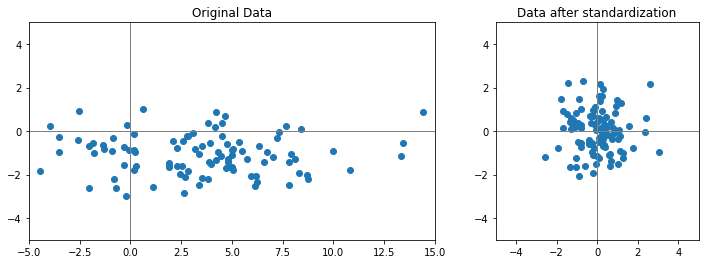

In [32]:
# 표준화를 한 경우 데이터의 분포 차이

fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

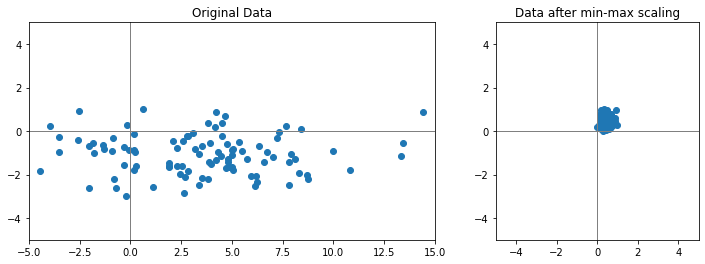

In [33]:
# Min_Max Scaling을 한 경우 데이터의 분포 차이

fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

### 주의사항 - Train  데이터를 정규화시킨 경우 기준 그대로 Test 데이터도 정규화를 해주어야 한다.

### 원-핫 인코딩
- 머신러닝이나 딥러닝 프레임워크에서 범주형을 지원하지 않는 경우 원-핫 인코딩을 해야 한다.
- 원-핫 인코딩이란 카테고리별 이진 특성을 만들어 해당하는 특성만 1의 값을 가지고 나머지는 0으로 만드는 방법이다.

In [36]:
# pandas에서는 get_dummies 함수를 통해서 손쉽게 원-핫 인코딩을 할 수 있다.

#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [37]:
# pd.concat 함수로 데이터프레임 trade와 country를 합쳐줍니다.

trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


In [38]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


### 구간화
- 데이터를 구간별로 나눌 수 있다.
- 이런 기법을 구간화(Data binning 혹은 bucketing)이라고 한다.

In [40]:
# salary에 소득 데이터가 있다고 가정하자.

salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])


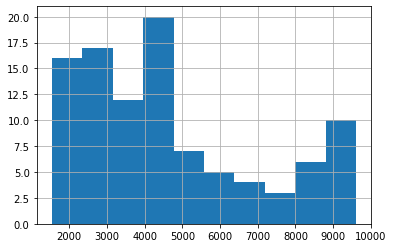

In [41]:
salary.hist()

In [42]:
# cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형시킬 수 있다.
# cut을 사용하기 위해 우선 구간을 정해준다.

bins = [0, 2000, 4000, 6000, 8000, 10000]

In [43]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] <
                                         (8000, 10000]]

In [44]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [45]:
# 구간별로 값이 몇 개 속해있는지 value_counts()로 확인할 수 있다.

ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [46]:
# 특정 구간을 지정해줄 수 있고 구간의 개수를 지정해 줄 수 있다.
# bins 옵션에 정수를 입력하면 최솟값에서 최댓값을 균등하게 bins 개수만큼 나눠준다.

ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] <
                                           (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [47]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

- qcut은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠준다.

In [50]:

ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] <
                                           (4648.0, 7068.0] < (7068.0, 9610.0]]

In [49]:
ctg.value_counts().sort_index()

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64